<a href="https://colab.research.google.com/github/nagdatt/BreastCancerDeacease/blob/main/breast_cancer_decease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [3]:
data.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [4]:
data.shape

(398, 32)

#Data Visualization

In [5]:
data.diagnosis.value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
labaling=LabelEncoder()

In [7]:
data.iloc[:,-1]=labaling.fit_transform(data.iloc[:,-1].values)

In [8]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,0
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,0
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,0
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,0
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1


# Knowing Correlation between data

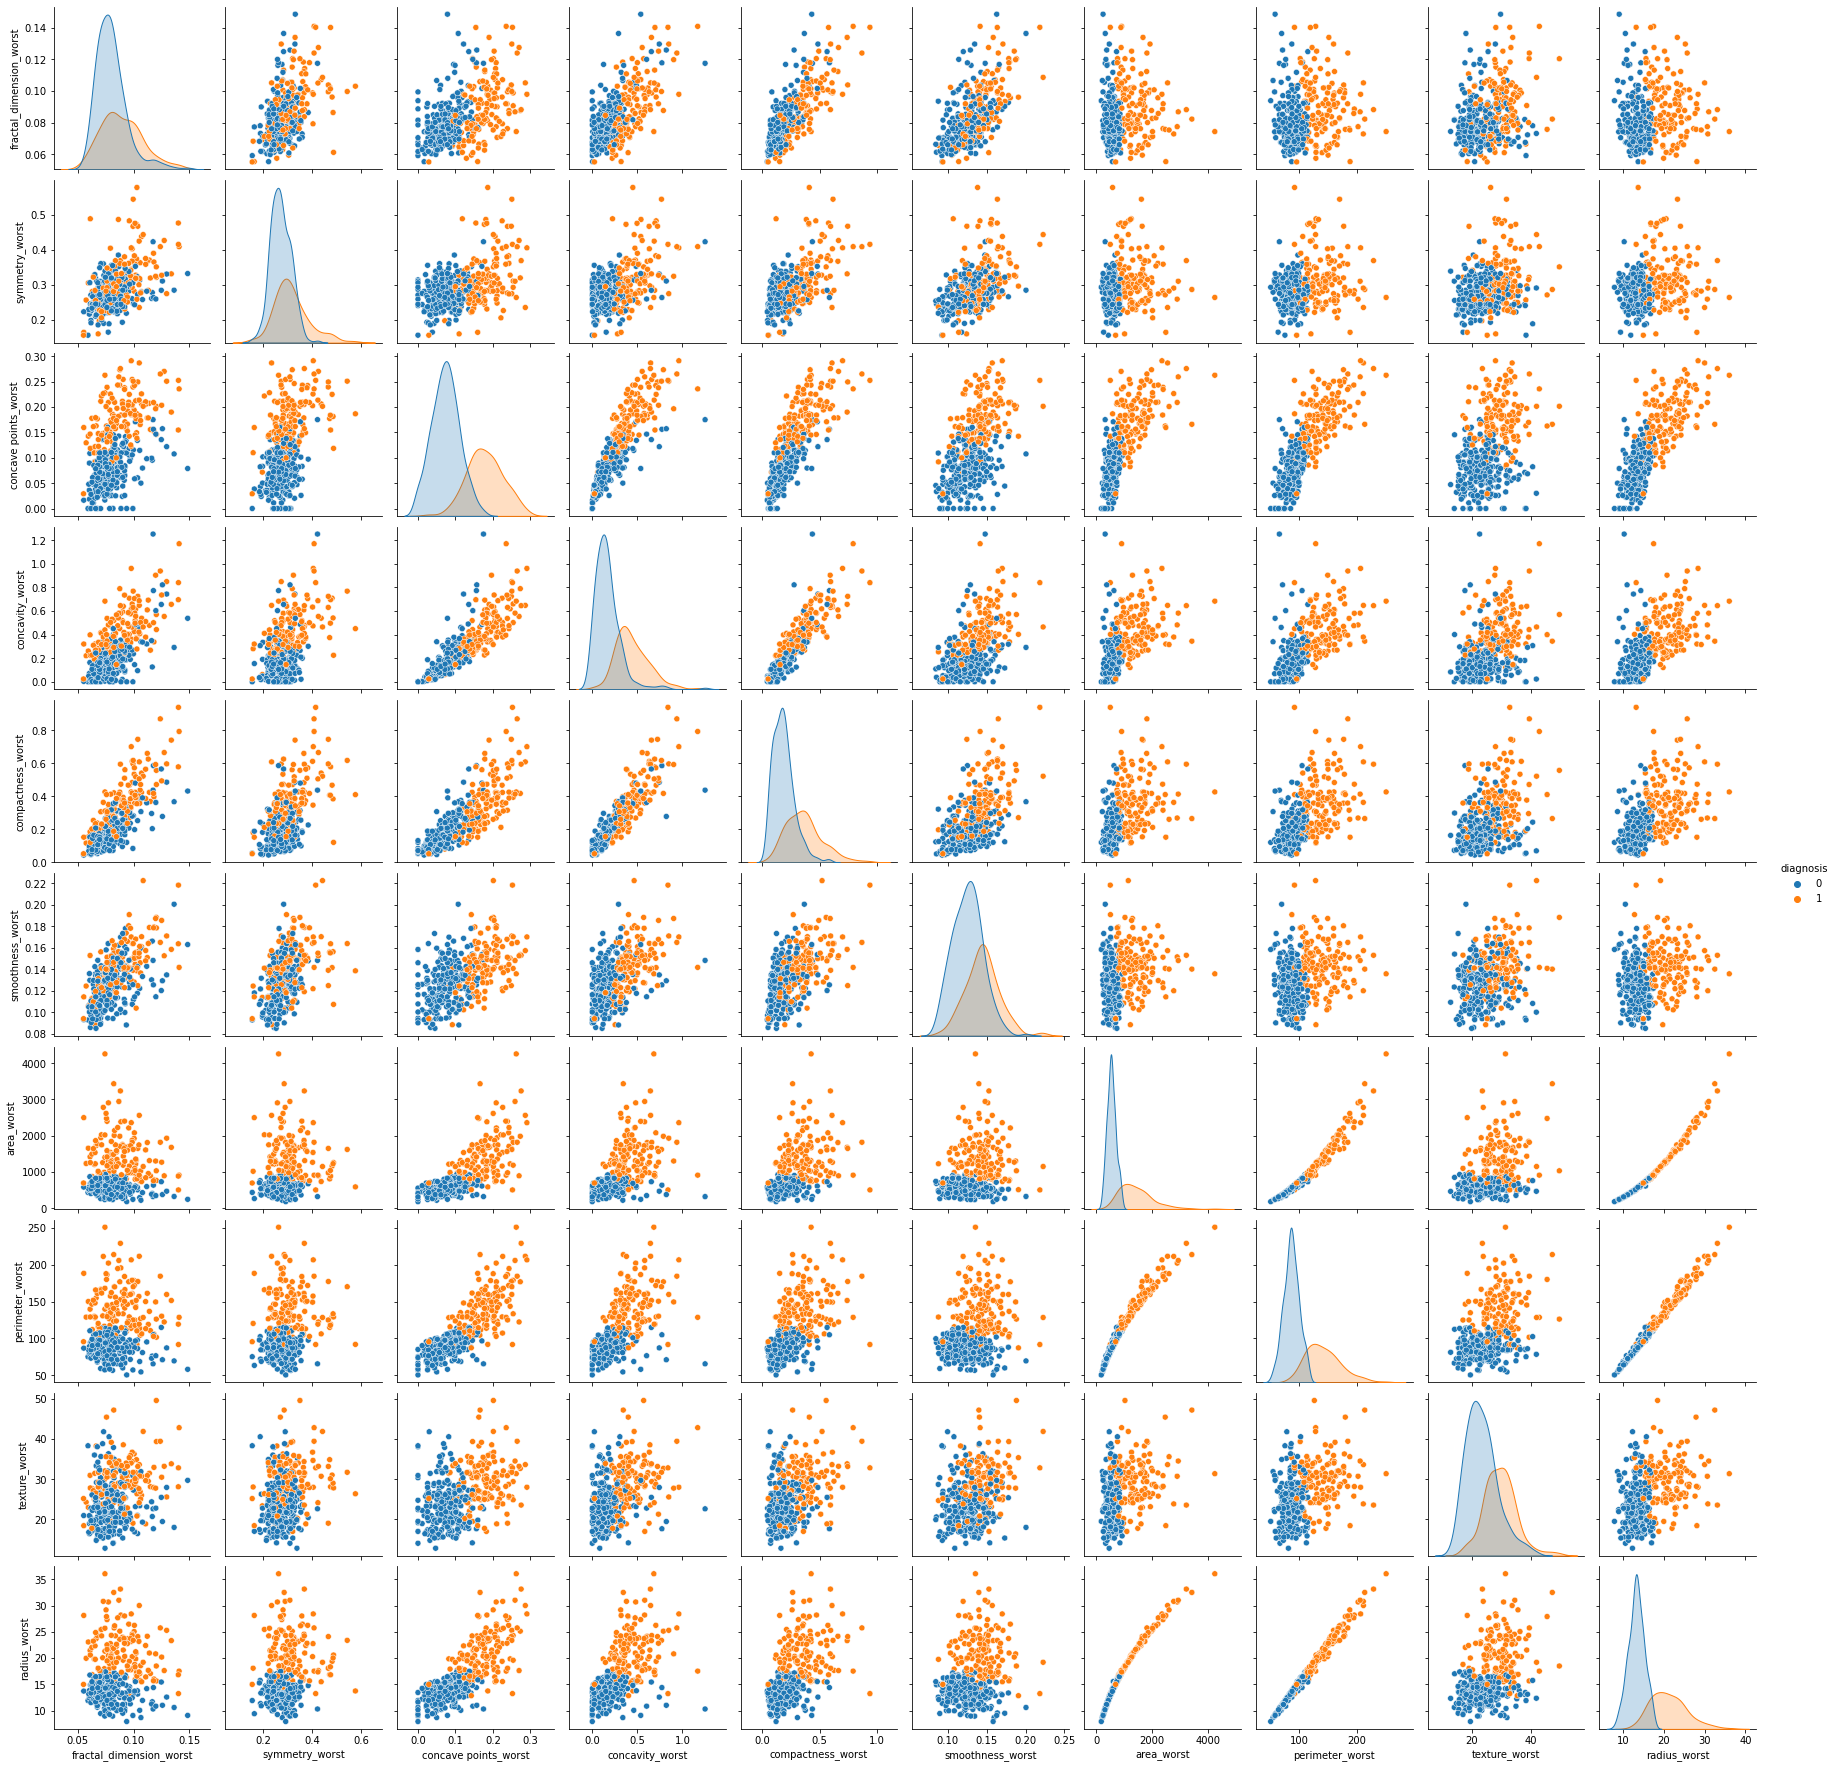

In [13]:
sns.pairplot(data.iloc[:,-1:-12:-1],hue='diagnosis')

In [12]:
data.iloc[:,2:32].corr()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
texture_mean,1.000000,0.377602,0.371092,0.009188,0.283013,0.343909,0.347076,0.074819,-0.071212,0.317878,0.427460,0.321211,0.298161,0.038002,0.206999,0.137678,0.186839,-0.012439,0.073012,0.402402,0.909448,0.410636,0.400265,0.131954,0.306401,0.329708,0.333799,0.095071,0.135850,0.451652
perimeter_mean,0.377602,1.000000,0.986029,0.215509,0.580307,0.720764,0.859523,0.145323,-0.284797,0.696138,-0.074023,0.697652,0.737701,-0.210177,0.275380,0.204652,0.403991,-0.082423,-0.009638,0.969895,0.337438,0.969863,0.939864,0.168529,0.505573,0.575270,0.779149,0.172585,0.055418,0.754676
area_mean,0.371092,0.986029,1.000000,0.185633,0.524159,0.696779,0.834096,0.115726,-0.303085,0.746399,-0.058272,0.740162,0.802528,-0.169248,0.243725,0.191596,0.374022,-0.069897,-0.017722,0.962820,0.320911,0.958728,0.958249,0.141403,0.443660,0.528460,0.731554,0.127453,0.011020,0.721542
smoothness_mean,0.009188,0.215509,0.185633,1.000000,0.633941,0.507177,0.536495,0.532225,0.546585,0.267633,0.122879,0.269499,0.226801,0.284216,0.278271,0.231168,0.339563,0.156096,0.222125,0.213582,0.080926,0.238416,0.206867,0.774433,0.450434,0.426570,0.481344,0.354264,0.457513,0.339341
compactness_mean,0.283013,0.580307,0.524159,0.633941,1.000000,0.877536,0.832109,0.581543,0.515431,0.500400,0.097833,0.555467,0.454123,0.108126,0.724252,0.542006,0.630444,0.211784,0.447573,0.559828,0.292928,0.613184,0.533080,0.545285,0.866952,0.810001,0.808524,0.481947,0.659135,0.584091
concavity_mean,0.343909,0.720764,0.696779,0.507177,0.877536,1.000000,0.916765,0.474787,0.303101,0.626819,0.111686,0.653508,0.607040,0.085109,0.679806,0.681740,0.690816,0.170403,0.428224,0.691384,0.333262,0.730322,0.681134,0.440080,0.762450,0.885576,0.853648,0.388345,0.498175,0.674906
concave points_mean,0.347076,0.859523,0.834096,0.536495,0.832109,0.916765,1.000000,0.416276,0.123031,0.688619,0.054958,0.703480,0.677235,0.007147,0.499940,0.415521,0.610225,0.079873,0.230368,0.835211,0.337172,0.859342,0.814219,0.441862,0.687621,0.752165,0.905909,0.341613,0.347100,0.773784
symmetry_mean,0.074819,0.145323,0.115726,0.532225,0.581543,0.474787,0.416276,1.000000,0.476693,0.269129,0.196430,0.282842,0.184678,0.156855,0.408588,0.348500,0.395309,0.456221,0.312216,0.146293,0.107975,0.179625,0.140769,0.385940,0.449289,0.418030,0.385992,0.695937,0.423496,0.280182
fractal_dimension_mean,-0.071212,-0.284797,-0.303085,0.546585,0.515431,0.303101,0.123031,0.476693,1.000000,-0.024541,0.234046,0.021214,-0.111211,0.405039,0.528241,0.458629,0.335837,0.337523,0.655847,-0.277611,-0.038969,-0.230473,-0.253906,0.454680,0.385923,0.308948,0.122790,0.287200,0.745667,-0.069516
radius_se,0.317878,0.696138,0.746399,0.267633,0.500400,0.626819,0.688619,0.269129,-0.024541,1.000000,0.227789,0.973322,0.954292,0.133912,0.374562,0.313935,0.498360,0.226888,0.222375,0.709666,0.218145,0.713635,0.752372,0.102756,0.311547,0.378817,0.515456,0.063111,0.036310,0.551393


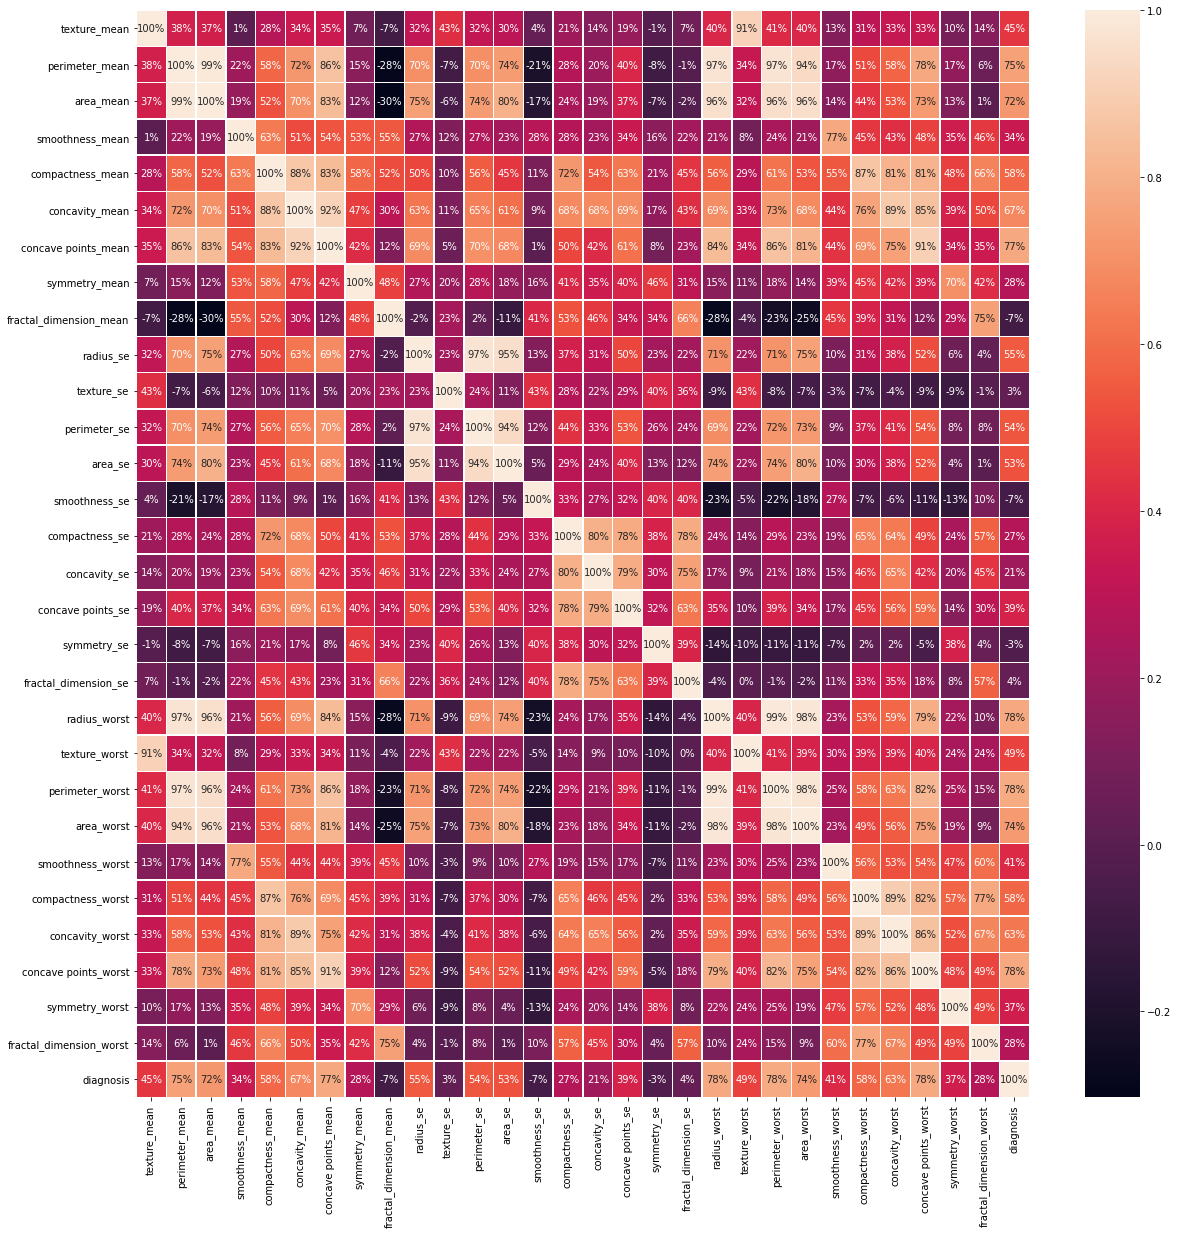

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.iloc[:,2:32].corr(),annot=True,linewidths=.5,fmt='.0%')

In [28]:
X=data.iloc[:,2:31].values
Y=data.iloc[:,31].values

In [86]:
Y

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [141]:

breast_cancer_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Testing_set_breastcancer.csv')
X_train=X
y_train=data.iloc[:,-1].values
X_test=breast_cancer_eval.iloc[:,2:31].values


In [142]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



In [130]:
breast_cancer_eval.shape

(171, 31)

#Model Creation


*   DecisionTree
*   RandomForest
*   KNeighbors




In [143]:
def models():
  #DecisionTree
  
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=1)
  tree.fit(X_train,y_train)
  
  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
  rf.fit(X_train,y_train)
  
  #KNN 
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train,y_train)
  

  return tree,rf,knn
  
treeModel,rfModel,KnnModel=models()


# Model Accuracy and Prediction


In [145]:

###Predicted
print(" Prediction for  DecisionTree:\n  ",treeModel.predict(X_test),end="\n\n")
print(" Prediction for  RandomForest:\n  ",rfModel.predict(X_test),end="\n\n")
print(" Prediction for  KNN:\n  ",KnnModel.predict(X_test),end="\n\n")


 Prediction for  DecisionTree:
   [1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0]

 Prediction for  RandomForest:
   [1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0]

 Prediction for  KNN:
   [1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 